# In this notebook, we look at relating the two vector spaces

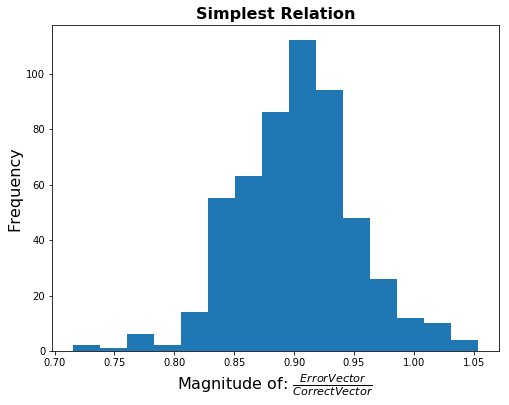

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Load Data (A little cleaner this time)
data = np.load('data_w_labels.npz')
Bdata = data['vec']     # Binder Word Vectors
Gdata = data['gVec']    # Google word Vectors
L1 = data['L1']     # Super Category labels
L2 = data['L2']     # Category labels

# Linear Relation and check
W_app = np.linalg.lstsq(Bdata, Gdata)[0]
error = Bdata.dot(W_app)
PercErr = np.sqrt(np.sum((Gdata - error)**2,axis=1) / np.sum(Gdata**2, axis=1))
plt.figure(1, figsize=(8,6))
plt.hist(PercErr,15)
plt.title('Simplest Relation', fontweight='bold', fontsize=16)
plt.xlabel(r'Magnitude of: $ \frac{Error Vector}{Correct Vector}$',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

# Lets try Machine learning ...
We can make three models. For each model, we will evaluate the same way. Just plug in the raw data, predict an output, and then find the difference vector for each word, and divide the magnitude of the difference vector for the word by the magnitude of the original word vector (for some sense of % error)
    1. Small Model
        * 1 hidden layer
    2. Deep model
        * 14 Hidden layers
    3. Wide model
        * 2 Hidden layers

Using TensorFlow backend.


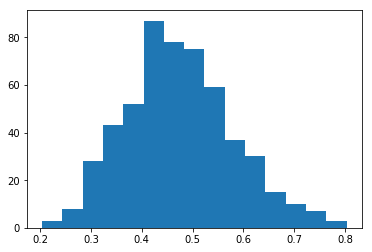

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense

# Lets make a small model first
model1 = Sequential()
model1.add(Dense(65, input_dim=65, kernel_initializer='normal', activation='relu'))
model1.add(Dense(200, input_dim=65, kernel_initializer='normal', activation='relu'))
model1.add(Dense(300, input_dim=200, kernel_initializer='normal'))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(Bdata, Gdata, epochs=10000, batch_size=535,  verbose=0)


# Lets see what the error is
M1error = np.sqrt(np.sum((Gdata - model1.predict(Bdata))**2,axis=1) / np.sum(Gdata**2, axis=1))
plt.hist(M1error,15)
plt.title('Simple NN', fontweight='bold', fontsize=16)
plt.xlabel(r'Magnitude of: $ \frac{Error Vector}{Correct Vector}$',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

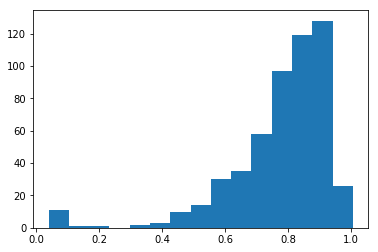

In [3]:
# Lets make a deeper model
model2 = Sequential()
model2.add(Dense(65, input_dim=65, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=65, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(200, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, input_dim=200, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, kernel_initializer='normal'))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(Bdata, Gdata, epochs=10000, batch_size=535,  verbose=0)
# Lets see what the error is
M2error = np.sqrt(np.sum((Gdata - model2.predict(Bdata))**2,axis=1) / np.sum(Gdata**2, axis=1))
plt.hist(M2error,15)
plt.title('Deep NN', fontweight='bold', fontsize=16)
plt.xlabel(r'Magnitude of: $ \frac{Error Vector}{Correct Vector}$',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

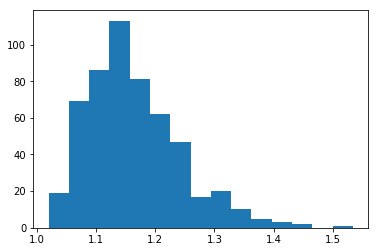

In [4]:
# Lets make a wider model
model3 = Sequential()
model3.add(Dense(65, input_dim=65, kernel_initializer='normal', activation='relu'))
model3.add(Dense(300, input_dim=65, kernel_initializer='normal', activation='relu'))
model3.add(Dense(500, input_dim=300, kernel_initializer='normal', activation='relu'))
model3.add(Dense(300, kernel_initializer='normal'))
model3.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(Bdata, Gdata, epochs=10000, batch_size=535,  verbose=0)
# Lets see what the error is
M3error = np.sqrt(np.sum((Gdata - model3.predict(Bdata))**2,axis=1) / np.sum(Gdata**2, axis=1))
plt.hist(M3error,15)
plt.title('Wide NN', fontweight='bold', fontsize=16)
plt.xlabel(r'Magnitude of: $ \frac{Error Vector}{Correct Vector}$',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()